# Table of Contents
 <p><div class="lev1 toc-item"><a data-toc-modified-id="Additive-Effects-only-(m_theta=0,-\lambda=0)-1" href="#Additive-Effects-only-(m_theta=0,-\lambda=0)"><span class="toc-item-num">1&nbsp;&nbsp;</span>Additive Effects only ($m_\theta=0, \lambda=0$)</a></div><div class="lev1 toc-item"><a data-toc-modified-id="Additive-effects-only,-in-two-batches:-m_{theta}-=-0-for-i-\in-[1,-25],-m_\theta-=-2-for-i-\in-[26,-30]-and-\lambda-=-0-2" href="#Additive-effects-only,-in-two-batches:-m_{theta}-=-0-for-i-\in-[1,-25],-m_\theta-=-2-for-i-\in-[26,-30]-and-\lambda-=-0"><span class="toc-item-num">2&nbsp;&nbsp;</span>Additive effects only, in two batches: $m_{\theta} = 0$ for $i \in [1, 25]$, $m_\theta = 2$ for $i \in [26, 30]$ and $\lambda = 0$</a></div><div class="lev1 toc-item"><a data-toc-modified-id="Additive-and-non-additive-effects:-m_theta-=-0-and-\lambda-=-1-3" href="#Additive-and-non-additive-effects:-m_theta-=-0-and-\lambda-=-1"><span class="toc-item-num">3&nbsp;&nbsp;</span>Additive and non-additive effects: $m_\theta = 0$ and $\lambda = 1$</a></div><div class="lev1 toc-item"><a data-toc-modified-id="Additive-and-non-additive-effects,-in-two-batches:-m_{theta}-=-0-for-i-\in-[1,-25],-m_\theta-=-2-for-i-\in-[26,-30]-and-\lambda-=-1-4" href="#Additive-and-non-additive-effects,-in-two-batches:-m_{theta}-=-0-for-i-\in-[1,-25],-m_\theta-=-2-for-i-\in-[26,-30]-and-\lambda-=-1"><span class="toc-item-num">4&nbsp;&nbsp;</span>Additive and non-additive effects, in two batches: $m_{\theta} = 0$ for $i \in [1, 25]$, $m_\theta = 2$ for $i \in [26, 30]$ and $\lambda = 1$</a></div>

In [1]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import pandas as pd
sns.set_style('whitegrid')


In [2]:
m = 30
n = 10000
m_u = 5
s2_u = 0.5
s2_0 = 0.5
alpha = 10
beta = 1
np.random.seed(42)


\begin{align*}
y_{ij} &= \mu_j + \theta_i + \gamma_{ij} + \epsilon_{ij}\\
\mu_j &\sim N(m_\mu, s^2_\mu)\\
\theta_i &\sim N(m_\theta, s^2_\theta)\\
\gamma_{ij} &= \lambda (\theta_i-\bar{\theta})(\mu_j-\bar{\mu})\\
\epsilon_{ij} &= N(0, \sigma_j^2)\\
1/\sigma^2_j &\sim Gamma(\alpha, \beta)\\
m_\mu &= 5\\
s^2_\mu &= 0.5\\
s^2_\theta &= 0.5\\
\end{align*}


# Additive Effects only ($m_\theta=0, \lambda=0$)

In [3]:
# m (samples) rows, n (genes) cols
m_0 = 0
mu = np.random.normal(m_u, np.sqrt(s2_u), n)
theta = np.random.normal(m_0, np.sqrt(s2_0), m)

eps_sigma2 = 1/np.random.gamma(alpha, beta, (m,n))
epsilon = np.random.normal(0, np.sqrt(eps_sigma2))

theta_M = np.tile(theta, (n,1)).T
mu_M = np.tile(mu, (m,1))

Y = mu_M + theta_M + epsilon

df = pd.DataFrame(Y.T)
df.columns = map(lambda x: str(x), range(1, m+1))
df_median = df.sub(df.median(axis=1), axis=0)

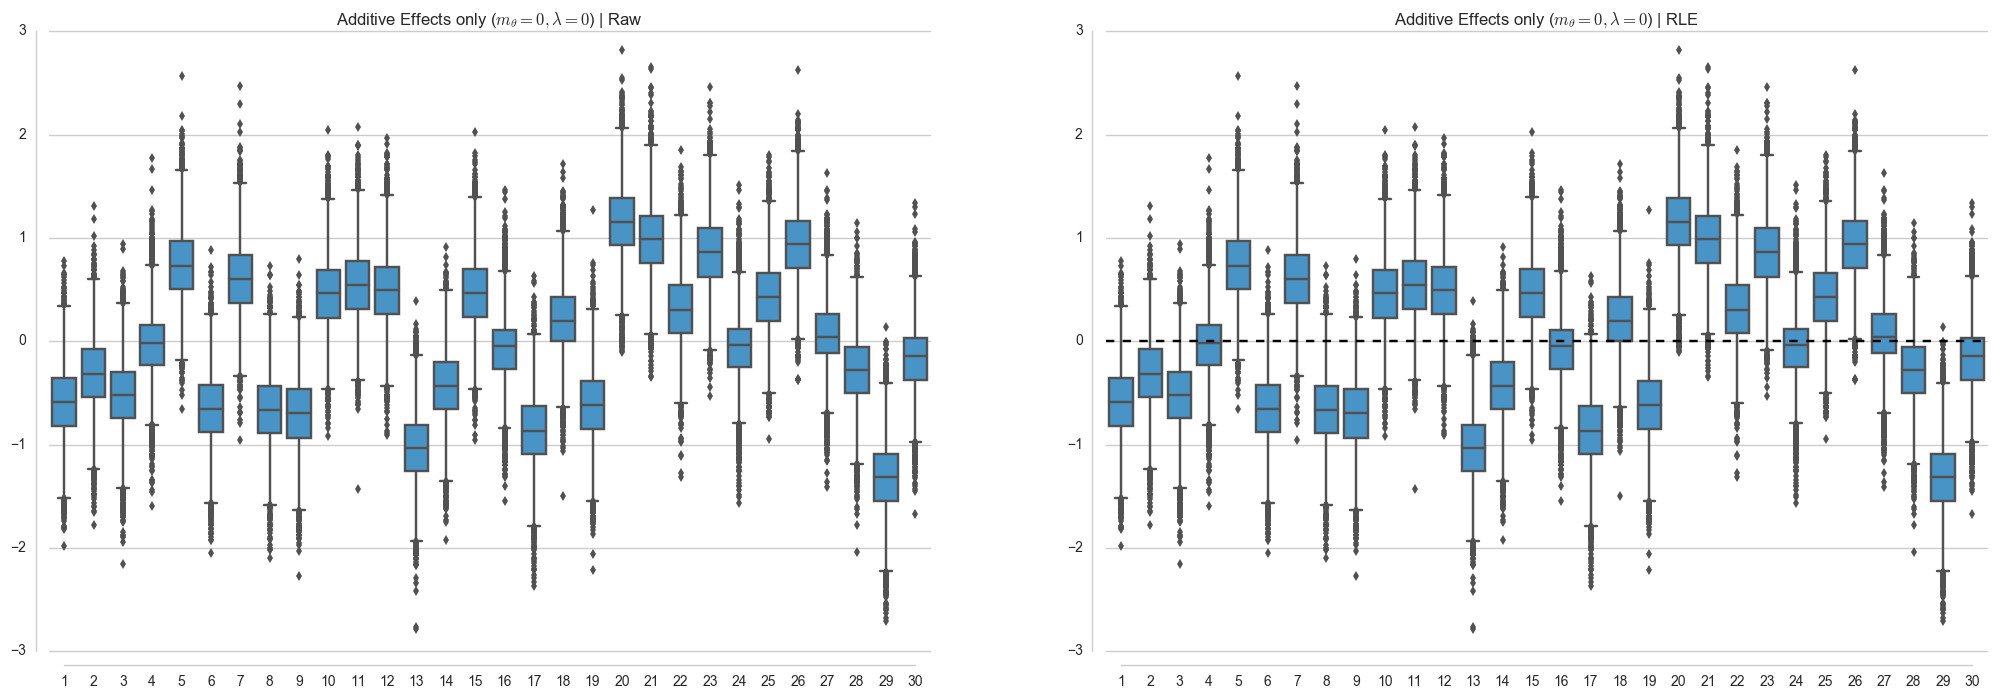

In [4]:
fig = plt.figure(figsize=(25,8))
ax = plt.subplot(1, 2, 1)
sns.boxplot(data=df_median, color='#3498db', ax=ax)    
sns.despine(offset=10, trim=True)
ax.set_title('Additive Effects only ($m_{\\theta}=0, \lambda=0$) | Raw')

ax = plt.subplot(1, 2, 2)
sns.boxplot(data=df_median, color='#3498db', ax=ax)    
plt.axhline(y=0, color='black', linestyle='--')
sns.despine(offset=10, trim=True)
ax.set_title('Additive Effects only ($m_{\\theta}=0, \lambda=0$) | RLE')

# Additive effects only, in two batches: $m_{\theta} = 0$ for $i \in [1, 25]$, $m_\theta = 2$ for $i \in [26, 30]$ and $\lambda = 0$


In [5]:
# m (samples) rows, n (genes) cols
m_0 = 0
np.random.seed(42)
mu = np.random.normal(m_u, np.sqrt(s2_u), n)
theta = np.random.normal(m_0, np.sqrt(s2_0), m-5)

m_0 = 2
theta = np.append(theta, np.random.normal(m_0, np.sqrt(s2_0), 5))


eps_sigma2 = 1/np.random.gamma(alpha, beta, (m,n))
epsilon = np.random.normal(0, np.sqrt(eps_sigma2))

theta_M = np.tile(theta, (n,1)).T
mu_M = np.tile(mu, (m,1))

Y = mu_M+theta_M+epsilon
df = pd.DataFrame(Y.T)
df.columns = map(lambda x: str(x), range(1, m+1))
df_median = df.sub(df.median(axis=1), axis=0)

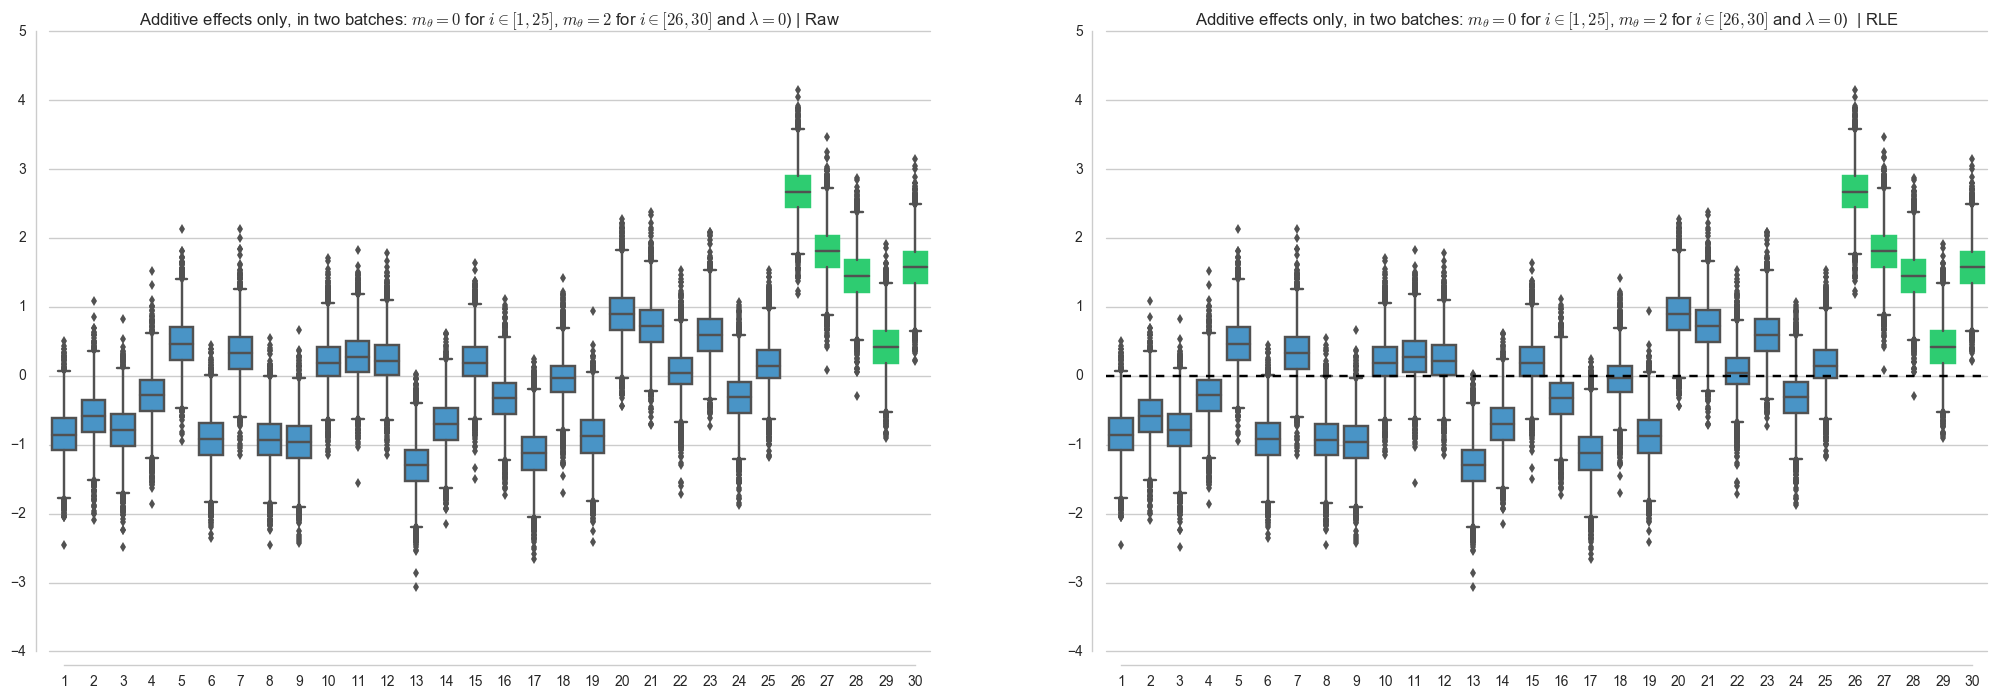

In [6]:
fig = plt.figure(figsize=(25,8))
ax = plt.subplot(1, 2, 1)
sns.boxplot(data=df_median, color='#3498db', ax=ax)    
sns.despine(offset=10, trim=True)
ax.set_title('Additive effects only, in two batches: $m_{\\theta} = 0$ for $i \in [1, 25]$, $m_\\theta = 2$ for $i \\in [26, 30]$ and $\\lambda = 0$) | Raw')
for i in range(m-5,m):
    x = ax.artists[i]
    x.set_color('#2ecc71')

ax = plt.subplot(1, 2, 2)
sns.boxplot(data=df_median, color='#3498db', ax=ax)    
plt.axhline(y=0, color='black', linestyle='--')
sns.despine(offset=10, trim=True)
ax.set_title('Additive effects only, in two batches: $m_{\\theta} = 0$ for $i \in [1, 25]$, $m_\\theta = 2$ for $i \\in [26, 30]$ and $\\lambda = 0$)  | RLE')
for i in range(m-5,m):
    x = ax.artists[i]
    x.set_color('#2ecc71')

# Additive and non-additive effects: $m_\theta = 0$ and $\lambda = 1$

In [7]:
# m (samples) rows, n (genes) cols
m_0 = 0
np.random.seed(42)
mu = np.random.normal(m_u, np.sqrt(s2_u), n)
mu = mu[np.newaxis]
theta = np.random.normal(m_0, np.sqrt(s2_0), m)
theta = theta[np.newaxis]
lambda_l = 1
gamma = lambda_l*(theta-np.mean(theta)).T*(mu-np.mean(mu))


eps_sigma2 = 1/np.random.gamma(alpha, beta, (m,n))
epsilon = np.random.normal(0, np.sqrt(eps_sigma2))

theta_M = np.tile(theta, (n,1)).T
mu_M = np.tile(mu, (m,1))

Y = mu_M+theta_M+epsilon+gamma
df = pd.DataFrame(Y.T)
df.columns = map(lambda x: str(x), range(1, m+1))
df_median = df.sub(df.median(axis=1), axis=0)

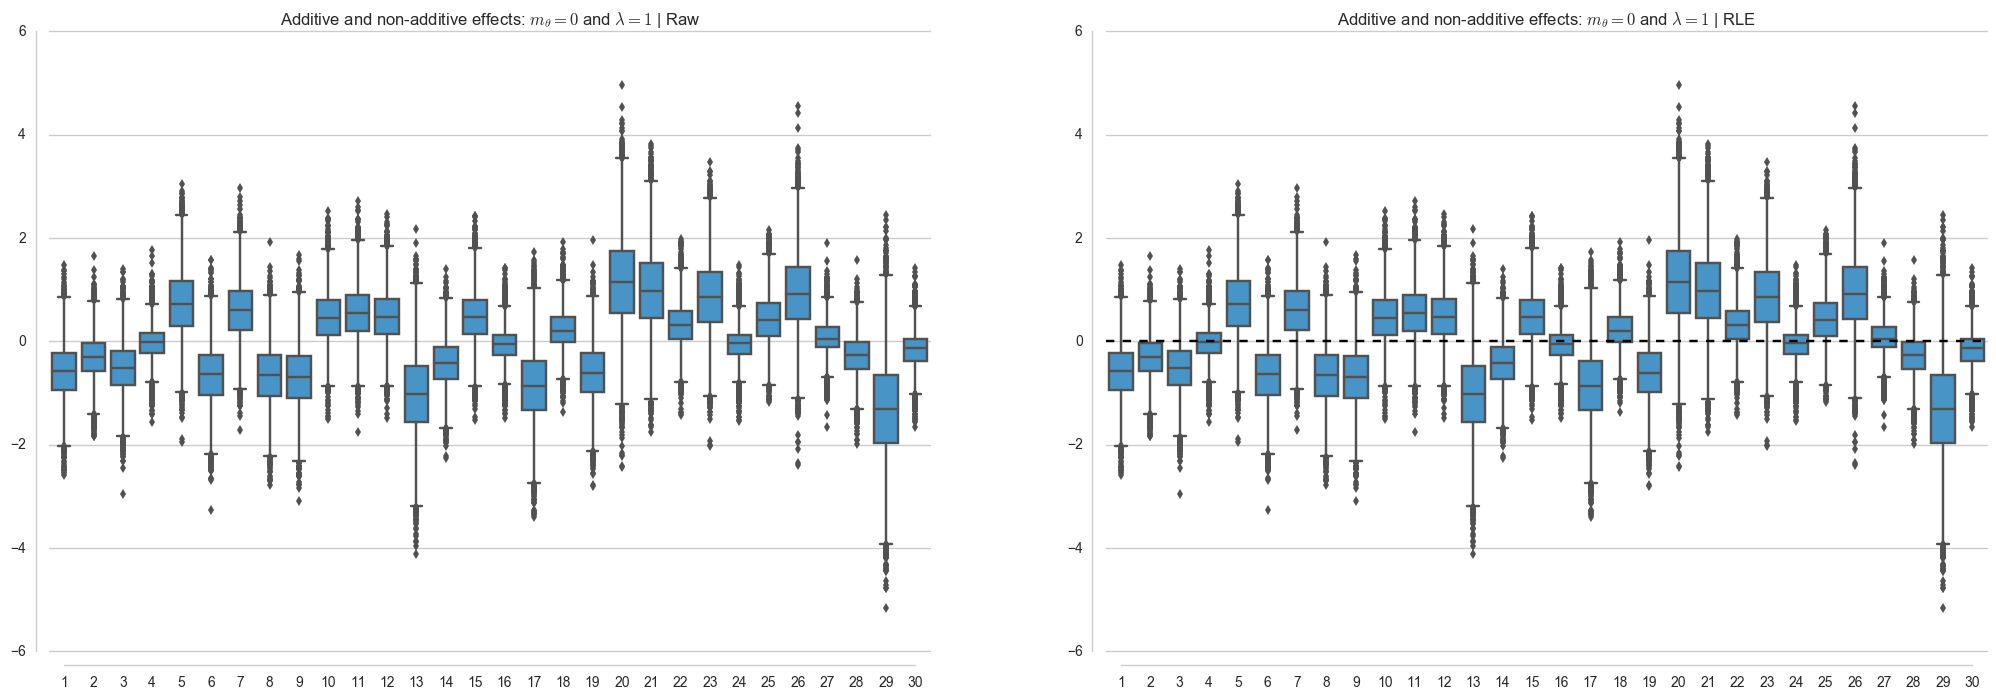

In [8]:
fig = plt.figure(figsize=(25,8))
ax = plt.subplot(1, 2, 1)
sns.boxplot(data=df_median, color='#3498db', ax=ax)    
sns.despine(offset=10, trim=True)
ax.set_title('Additive and non-additive effects: $m_\\theta = 0$ and $\\lambda = 1$ | Raw')

ax = plt.subplot(1, 2, 2)
sns.boxplot(data=df_median, color='#3498db', ax=ax)    
plt.axhline(y=0, color='black', linestyle='--')
sns.despine(offset=10, trim=True)
ax.set_title('Additive and non-additive effects: $m_\\theta = 0$ and $\\lambda = 1$ | RLE')

# Additive and non-additive effects, in two batches: $m_{\theta} = 0$ for $i \in [1, 25]$, $m_\theta = 2$ for $i \in [26, 30]$ and $\lambda = 1$


In [9]:
# m (samples) rows, n (genes) cols
m_0 = 0
np.random.seed(42)
mu = np.random.normal(m_u, np.sqrt(s2_u), n)
mu = mu[np.newaxis]
theta = np.random.normal(m_0, np.sqrt(s2_0), m-5)
theta = np.append(theta, np.random.normal(2, np.sqrt(s2_0), 5))
theta = theta[np.newaxis]



lambda_l = 1
gamma = lambda_l*(theta-np.mean(theta)).T*(mu-np.mean(mu))


eps_sigma2 = 1/np.random.gamma(alpha, beta, (m,n))
epsilon = np.random.normal(0, np.sqrt(eps_sigma2))

theta_M = np.tile(theta, (n,1)).T
mu_M = np.tile(mu, (m,1))

Y = mu_M+theta_M+epsilon+gamma
df = pd.DataFrame(Y.T)
df.columns = map(lambda x: str(x), range(1, m+1))
df_median = df.sub(df.median(axis=1), axis=0)

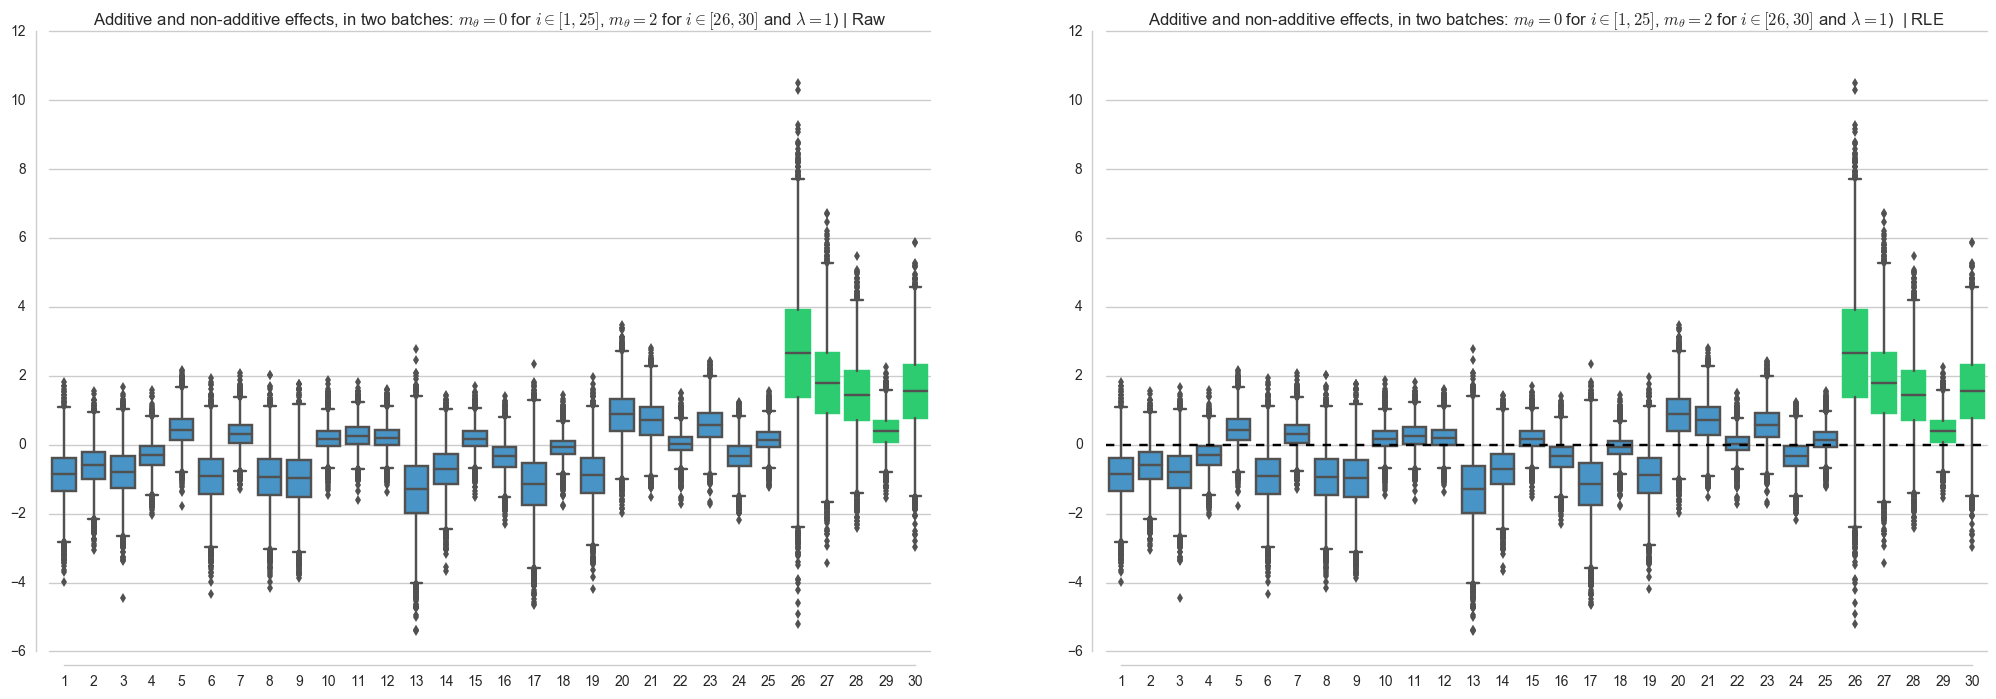

In [10]:
fig = plt.figure(figsize=(25,8))
ax = plt.subplot(1, 2, 1)
sns.boxplot(data=df_median, color='#3498db', ax=ax)    
sns.despine(offset=10, trim=True)
ax.set_title('Additive and non-additive effects, in two batches: $m_{\\theta} = 0$ for $i \in [1, 25]$, $m_\\theta = 2$ for $i \\in [26, 30]$ and $\\lambda = 1$) | Raw')
for i in range(m-5,m):
    x = ax.artists[i]
    x.set_color('#2ecc71')

ax = plt.subplot(1, 2, 2)
sns.boxplot(data=df_median, color='#3498db', ax=ax)    
plt.axhline(y=0, color='black', linestyle='--')
sns.despine(offset=10, trim=True)
ax.set_title('Additive and non-additive effects, in two batches: $m_{\\theta} = 0$ for $i \in [1, 25]$, $m_\\theta = 2$ for $i \\in [26, 30]$ and $\\lambda = 1$)  | RLE')
for i in range(m-5,m):
    x = ax.artists[i]
    x.set_color('#2ecc71')